<a href="https://colab.research.google.com/github/mirpouya/GANs/blob/main/Introduction_to_DCGANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> 1. Downloading the Dataset </h1>

In [1]:
!pip install opendatasets --upgrade --quiet

In [4]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/splcher/animefacedataset'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pouyammsadeghi
Your Kaggle Key: ··········


100%|██████████| 395M/395M [00:04<00:00, 96.5MB/s]


In [5]:
import os

DATA_DIR = './animefacedataset'
print(os.listdir(DATA_DIR))

['images']


In [6]:
print(os.listdir(DATA_DIR+'/images')[:10])

['47357_2014.jpg', '40150_2012.jpg', '59421_2018.jpg', '2206_2001.jpg', '31242_2010.jpg', '29433_2010.jpg', '39358_2012.jpg', '19860_2007.jpg', '5988_2003.jpg', '49913_2015.jpg']


<b> Visualizing some of the data <'/b>

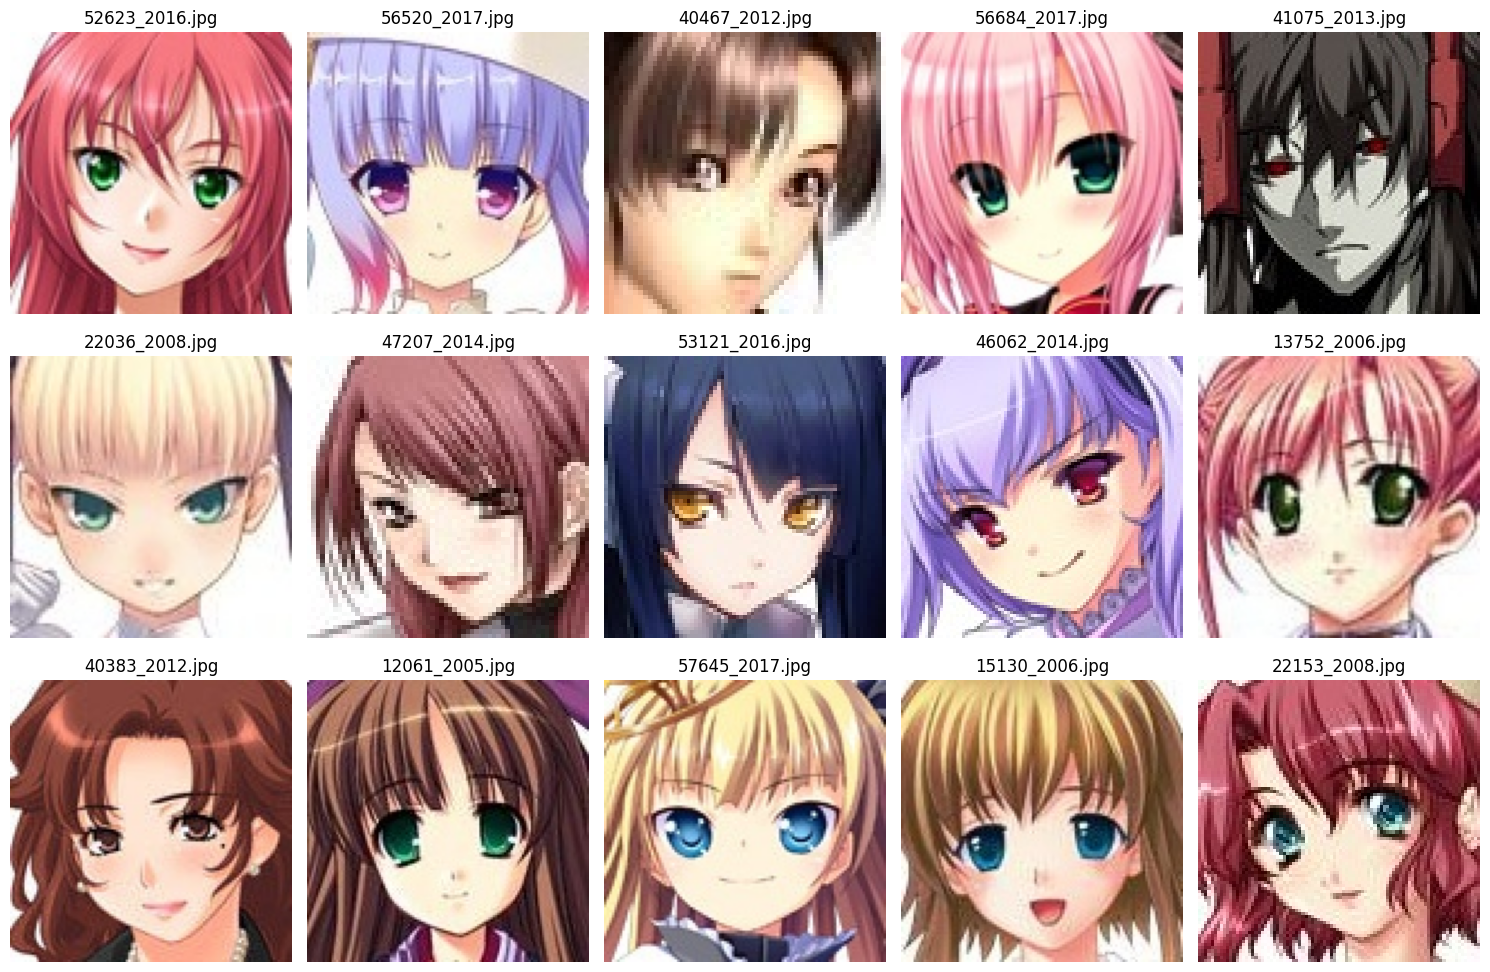

In [20]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Path to the directory containing the images
dataset_dir = "/content/animefacedataset/images"

# Get a list of all image files
image_files = os.listdir(dataset_dir)

# Select 15 random images
random_images = random.sample(image_files, 15)

# Define the size of the grid for subplots
rows = 3
cols = 5

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axes array to easily iterate over subplots
axes = axes.flatten()

# Loop through each random image and plot it
for i, image_name in enumerate(random_images):
    # Open the image
    image_path = os.path.join(dataset_dir, image_name)
    image = Image.open(image_path)

    # Plot the image on the corresponding subplot
    axes[i].imshow(image)
    axes[i].axis('off')  # Hide axis

    # Set subplot title as the image filename
    axes[i].set_title(image_name)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [7]:
# DataLoader
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as T

<b> STEPS </B>
* RESIZE and CROP images to (64, 64)
* NORMALIZE pixel values in range of (-1, 1) in each channel
* create DATALOADER to load the data into batches

In [8]:
image_size = 64
batch_size = 128

# normalizing with mean of 0.5 and std of 0.5 in each channel
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)

<font color='blue'> <b> QUESTION: </b> </font>
what is ImageFolder used for?

In [12]:
train_dataset = ImageFolder(
    DATA_DIR,
    transform = T.Compose([
        T.Resize(image_size),
        T.CenterCrop(image_size),
        T.ToTensor(),
        T.Normalize(*stats)]
    )
)

In [18]:
# DataLoader
train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=3, pin_memory=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [19]:
# LIBRARIES
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline